In [87]:
# %config InlineBackend.figure_format = 'retina'
# !apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import torch

import pickle
from collections import Counter

In [20]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10).get_name()
plt.rc('font', family=font) 

# EDA

In [2]:
train_data = pd.read_csv('input/data/train/train.tsv', delimiter='\t', header=None)

In [3]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


In [40]:
classes = train_data[8].unique()
num_classes = Counter(train_data[8])

In [127]:
num_classes

Counter({'단체:제작': 171,
         '관계_없음': 4432,
         '단체:별칭': 231,
         '인물:직업/직함': 553,
         '인물:부모님': 164,
         '단체:모회사': 44,
         '단체:구성원': 815,
         '인물:소속단체': 683,
         '단체:본사_주(도)': 23,
         '인물:출신성분/국적': 209,
         '단체:상위_단체': 335,
         '인물:동료': 186,
         '인물:형제/자매/남매': 52,
         '인물:학교': 9,
         '인물:출생_도시': 4,
         '인물:종교': 15,
         '단체:주주': 11,
         '인물:거주_국가': 27,
         '인물:거주_주(도)': 12,
         '인물:기타_친족': 58,
         '단체:본사_국가': 115,
         '인물:출생_일시': 36,
         '인물:배우자': 92,
         '단체:본사_도시': 135,
         '인물:별칭': 103,
         '인물:제작': 56,
         '인물:자녀': 84,
         '인물:사망_일시': 45,
         '단체:해산일': 15,
         '단체:창립일': 67,
         '단체:창립자': 45,
         '단체:하위_단체': 79,
         '인물:거주_도시': 26,
         '인물:사망_원인': 7,
         '단체:정치/종교성향': 18,
         '인물:출생_국가': 8,
         '단체:자회사': 6,
         '인물:사망_도시': 3,
         '인물:용의자': 11,
         '단체:구성원_수': 9,
         '인물:나이': 5,
         '

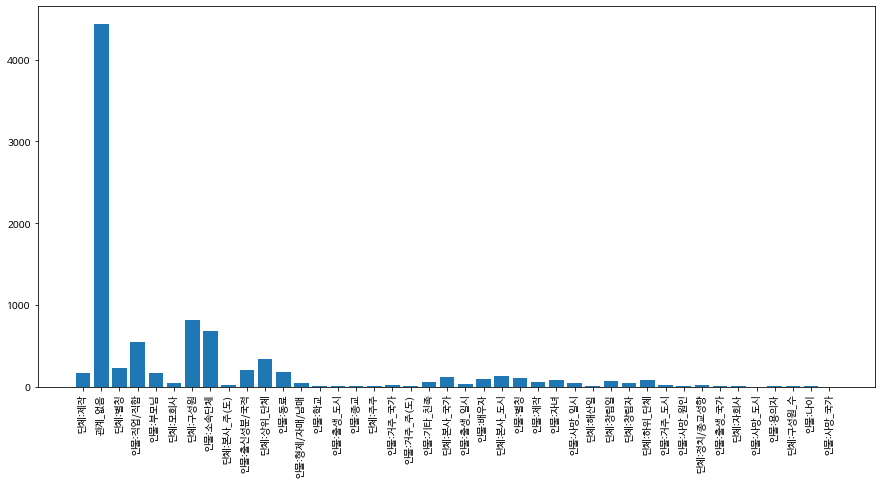

In [23]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.bar(num_classes.keys(), num_classes.values())
plt.xticks(rotation=90)
plt.show()

In [60]:
print(f'total number of data : {sum(num_classes.values())}')
print(f'number of 관계_없음 : {num_classes["관계_없음"]}')

total number of data : 9000
number of 관계_없음 : 4432


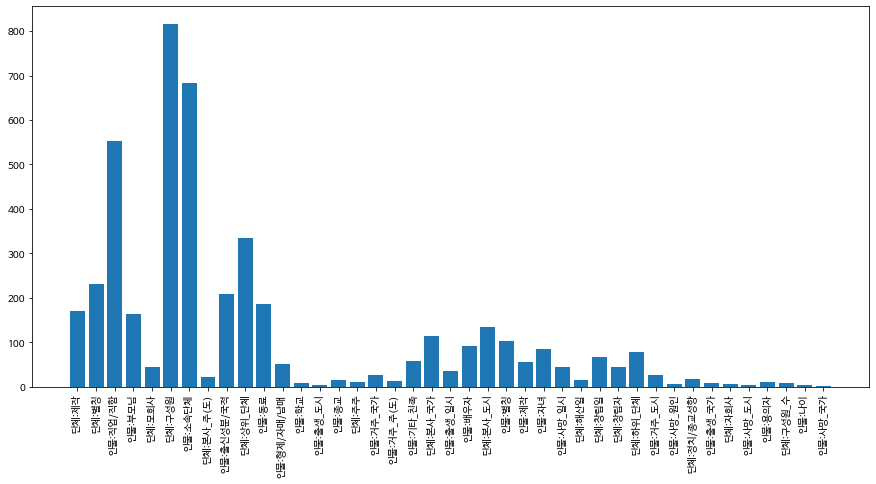

In [45]:
# 관계_없음을 제외한 bar plot
num_classes_rel = num_classes.copy()
num_classes_rel.pop('관계_없음')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.bar(num_classes_rel.keys(), num_classes_rel.values())
plt.xticks(rotation=90)
plt.show()

In [97]:
with open('/opt/ml/input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)

In [125]:
sorted_num_classes_rel = sorted(num_classes_rel.items(), key=lambda x:x[1], reverse=True)
for class_name, num in sorted_num_classes_rel:
    print(f'percentage of {class_name} ({label_type[class_name]}) : {num/9000:.3f}')

percentage of 단체:구성원 (10) : 0.091
percentage of 인물:소속단체 (4) : 0.076
percentage of 인물:직업/직함 (2) : 0.061
percentage of 단체:상위_단체 (15) : 0.037
percentage of 단체:별칭 (6) : 0.026
percentage of 인물:출신성분/국적 (7) : 0.023
percentage of 인물:동료 (5) : 0.021
percentage of 단체:제작 (17) : 0.019
percentage of 인물:부모님 (8) : 0.018
percentage of 단체:본사_도시 (20) : 0.015
percentage of 단체:본사_국가 (9) : 0.013
percentage of 인물:별칭 (24) : 0.011
percentage of 인물:배우자 (1) : 0.010
percentage of 인물:자녀 (21) : 0.009
percentage of 단체:하위_단체 (23) : 0.009
percentage of 단체:창립일 (33) : 0.007
percentage of 인물:기타_친족 (11) : 0.006
percentage of 인물:제작 (22) : 0.006
percentage of 인물:형제/자매/남매 (25) : 0.006
percentage of 인물:사망_일시 (14) : 0.005
percentage of 단체:창립자 (12) : 0.005
percentage of 단체:모회사 (3) : 0.005
percentage of 인물:출생_일시 (27) : 0.004
percentage of 인물:거주_국가 (35) : 0.003
percentage of 인물:거주_도시 (32) : 0.003
percentage of 단체:본사_주(도) (16) : 0.003
percentage of 단체:정치/종교성향 (38) : 0.002
percentage of 인물:종교 (34) : 0.002
percentage of 단체:해산일 (31) 

# EDA train_all.tsv

In [105]:
# train+all : train + additional data in 토론 게시판
train_data = pd.read_csv('input/data/train/train+all.tsv', delimiter='\t', header=None)

In [106]:
with open('/opt/ml/input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)

In [107]:
num_classes = Counter(train_data[8])

In [108]:
sorted_num_classes = sorted(num_classes.items(), key=lambda x:x[1], reverse=True)
for class_name, num in sorted_num_classes:
    print(f'percentage of {class_name} ({label_type[class_name]}) : {num}')

percentage of 인물:출신성분/국적 (7) : 78058
percentage of 인물:직업/직함 (2) : 35167
percentage of 단체:창립일 (33) : 27824
percentage of 인물:제작 (22) : 16654
percentage of 단체:제작 (17) : 15210
percentage of 단체:구성원 (10) : 14587
percentage of 인물:배우자 (1) : 11295
percentage of 인물:자녀 (21) : 10542
percentage of 인물:기타_친족 (11) : 9708
percentage of 인물:부모님 (8) : 4727
percentage of 관계_없음 (0) : 4407
percentage of 단체:상위_단체 (15) : 3767
percentage of 인물:학교 (39) : 2071
percentage of 단체:정치/종교성향 (38) : 1609
percentage of 인물:소속단체 (4) : 1553
percentage of 단체:별칭 (6) : 223
percentage of 인물:동료 (5) : 186
percentage of 단체:창립자 (12) : 169
percentage of 단체:본사_도시 (20) : 135
percentage of 단체:본사_국가 (9) : 115
percentage of 인물:별칭 (24) : 102
percentage of 단체:하위_단체 (23) : 79
percentage of 인물:형제/자매/남매 (25) : 52
percentage of 인물:사망_일시 (14) : 45
percentage of 단체:모회사 (3) : 44
percentage of 인물:출생_일시 (27) : 36
percentage of 인물:거주_국가 (35) : 27
percentage of 인물:거주_도시 (32) : 26
percentage of 단체:본사_주(도) (16) : 22
percentage of 인물:종교 (34) : 15
percent

# add more data

In [43]:
num2label = {num : label for label, num in label_type.items()}

In [44]:
add_data19 = pd.read_csv('unpreprocessed_data/19_bornIn_city.tsv', delimiter='\t')
add_data26 = pd.read_csv('unpreprocessed_data/26_bornIn_country.tsv', delimiter='\t')
add_data37 = pd.read_csv('unpreprocessed_data/37_dienIn_city.tsv', delimiter='\t')
add_data40 = pd.read_csv('unpreprocessed_data/40_dienIn_country.tsv', delimiter='\t')
add_data = pd.concat([add_data19, add_data26, add_data37, add_data40])

In [70]:
preprocessed_data = []
for idx, data in enumerate(np.array(add_data)):
    data_name = f'from datahub {idx}'
    
    sen = data[0].strip()
    entity1 = data[1]
    entity2 = data[2]
    label = num2label[data[3]]
    
    start_ent1 = sen.find(entity1)
    end_ent1 =  start_ent1 + len(entity1) - 1
    
    start_ent2 = sen.find(entity2)
    end_ent2 =  start_ent2 + len(entity2) - 1
    
    preprocessed_data.append([data_name, sen, entity1, start_ent1, end_ent1, entity2, start_ent2, end_ent2, label])

In [72]:
preprocessed_data=pd.DataFrame(preprocessed_data)

In [109]:
final_data = pd.concat([train_data, preprocessed_data])

In [110]:
final_data

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님
...,...,...,...,...,...,...,...,...,...
50895,from datahub 50895,"테오도어 아이케(Theodor Eicke, 1892년 10월 17일 - 1943년 ...",에른스트 룀,119,124,나치 독일,55,59,인물:사망_국가
50896,from datahub 50896,"또한, 쿠바의 체 게바라 무덤은 체 게바라가 1967년에 볼리비아에서 전사했기 때문...",체 게바라,8,12,볼리비아,32,35,인물:사망_국가
50897,from datahub 50897,"하렘은 왕실의 가정으로 술탄과 그의 가족들이 살았으며, 터키의 초대 대통령인 무스타...",무스타파 케말 아타튀르크,43,55,터키,31,32,인물:사망_국가
50898,from datahub 50898,드디어 1965년 5월 18일 새벽 3시 35분 시리아 보안당국은 서둘러 엘리 코헨...,엘리 코헨,41,45,시리아,27,29,인물:사망_국가


In [111]:
final_data.to_csv('input/data/train/train+allx2.tsv', sep='\t', index=False, header=True)

In [113]:
final_data_check = pd.read_csv('input/data/train/train+allx2.tsv', delimiter='\t', header=None)
final_data_check

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님
...,...,...,...,...,...,...,...,...,...
289441,from datahub 50895,"테오도어 아이케(Theodor Eicke, 1892년 10월 17일 - 1943년 ...",에른스트 룀,119,124,나치 독일,55,59,인물:사망_국가
289442,from datahub 50896,"또한, 쿠바의 체 게바라 무덤은 체 게바라가 1967년에 볼리비아에서 전사했기 때문...",체 게바라,8,12,볼리비아,32,35,인물:사망_국가
289443,from datahub 50897,"하렘은 왕실의 가정으로 술탄과 그의 가족들이 살았으며, 터키의 초대 대통령인 무스타...",무스타파 케말 아타튀르크,43,55,터키,31,32,인물:사망_국가
289444,from datahub 50898,드디어 1965년 5월 18일 새벽 3시 35분 시리아 보안당국은 서둘러 엘리 코헨...,엘리 코헨,41,45,시리아,27,29,인물:사망_국가


# make QA dataset

In [153]:
pd.set_option('display.max_columns', 1000)

In [135]:
train_data = pd.read_csv('input/data/train/train.tsv', delimiter='\t', header=None)

In [156]:
for label in label_type.keys():
    print(label)
    print(train_data[train_data[8]==label][1].head())
    print(train_data[train_data[8]==label][[2,5]].head())
    print('\n')

관계_없음
1     선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...
5     이와 관련해 AFCD는 대학 소속 전문가와 세계동물보건기구(OIE)가 사람과 동물 ...
9     김동양 NH투자증권 연구원은 “삼성SDS의 3분기 매출액은 2조6604억원, 영업이...
11    이후 구 공화당계와 유신정우회계 인사들은 김종철, 이만섭을 중심으로 한국국민당을 조...
14    쇠뇌를 소지한 병사가 실전에 임한 것은 제3차 십자군 원정 때인데, 사자심왕 리처드...
Name: 1, dtype: object
         2        5
1      민주당      27석
5      OIE      전문가
9    삼성SDS      10%
11   유신정우회    한국국민당
14  리처드 1세  제3차 십자군


인물:배우자
167    이날 행사에는 문재인 대통령 부인 김정숙 여사가 현직 대통령 부인으로는 처음으로 청...
259                     김태희-비 커플은 연예계 대표 부동산 부자로 알려져 있다.
312    김용춘은 진지왕과 지도부인(知道夫人) 박씨의 아들로 진지왕이 579년에 죽은 뒤에 ...
383             무라트 3세는 술탄 셀림 2세와 눌바누 술탄의 사이에서 태어난 장자이다.
453    특히, 이날 행사에는 문재인 대통령 부인 김정숙 여사가 현직 대통령 부인으로는 처음...
Name: 1, dtype: object
         2           5
167    김정숙         문재인
259    김태희           비
312    진지왕  지도부인(知道夫人)
383  셀림 2세      눌바누 술탄
453    김정숙         문재인


인물:직업/직함
3     용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...
23    염건령 강사는 인구변화의 심각성을 얘기하면서, 저출생과 노인인구의 대폭적인 증

In [159]:
questions = ['의 배우자는 누구인가요?',
'의 직업은 무엇인가요?',
'의 모회사는 무엇인가요?',
'의 소속 단체는 무엇인가요?',
'의 동료는 누구인가요?',
'의 별칭은 무엇인가요?',
'의 국적은 어디인가요?',
'의 부모님은 누구인가요?',
'의 본사 국가는 어디인가요?',
'의 구성원은 누구인가요?',
'의 친족은 누구인가요?',
'의 창립자는 누구인가요?',
'의 주주는 누구인가요?',
'의 사망 일시는 언제인가요?',
'의 상위 단체는 무엇인가요?',
'의 본사는 어디인가요?',
'는 무엇을 제작하나요?',
'의 사망 원인은 무엇인가요?',
'의 출생 도시는 어디인가요?',
'의 본사 도시는 어디인가요?',
'의 자녀는 누구인가요?',
'는 무엇을 제작하였나요?',
'의 하위 단체는 무엇인가요?',
'의 별칭은 무엇인가요?',
'의 형제, 자매, 남매는 누구인가요?',
'의 출생 국가는 어디인가요?',
'의 출생 일시는 어디인가요?',
'의 구성원 수는 몇 명인가요?',
'의 자회사는 어디인가요?',
'는 어디에 거주하나요?',
'의 해산일은 언제인가요?',
'의 거주 도시는 어디인가요?',
'의 창립일은 언제인가요?',
'의 종교는 무엇인가요?',
'의 거주 국가는 어디인가요?',
'는 무엇의 용의자인가요?',
'의 사망 도시는 어디인가요?',
'의 정치, 종교 성향은 무엇인가요?',
'의 학교는 어디인가요?',
'의 사망 국가는 어디인가요?',
'의 나이는 몇 살인가요?']

In [165]:
label2q = {}
for label, question in zip(list(label_type.keys())[1:], questions):
    label2q[label] = question
label2q

{'인물:배우자': '의 배우자는 누구인가요?',
 '인물:직업/직함': '의 직업은 무엇인가요?',
 '단체:모회사': '의 모회사는 무엇인가요?',
 '인물:소속단체': '의 소속 단체는 무엇인가요?',
 '인물:동료': '의 동료는 누구인가요?',
 '단체:별칭': '의 별칭은 무엇인가요?',
 '인물:출신성분/국적': '의 국적은 어디인가요?',
 '인물:부모님': '의 부모님은 누구인가요?',
 '단체:본사_국가': '의 본사 국가는 어디인가요?',
 '단체:구성원': '의 구성원은 누구인가요?',
 '인물:기타_친족': '의 친족은 누구인가요?',
 '단체:창립자': '의 창립자는 누구인가요?',
 '단체:주주': '의 주주는 누구인가요?',
 '인물:사망_일시': '의 사망 일시는 언제인가요?',
 '단체:상위_단체': '의 상위 단체는 무엇인가요?',
 '단체:본사_주(도)': '의 본사는 어디인가요?',
 '단체:제작': '는 무엇을 제작하나요?',
 '인물:사망_원인': '의 사망 원인은 무엇인가요?',
 '인물:출생_도시': '의 출생 도시는 어디인가요?',
 '단체:본사_도시': '의 본사 도시는 어디인가요?',
 '인물:자녀': '의 자녀는 누구인가요?',
 '인물:제작': '는 무엇을 제작하였나요?',
 '단체:하위_단체': '의 하위 단체는 무엇인가요?',
 '인물:별칭': '의 별칭은 무엇인가요?',
 '인물:형제/자매/남매': '의 형제, 자매, 남매는 누구인가요?',
 '인물:출생_국가': '의 출생 국가는 어디인가요?',
 '인물:출생_일시': '의 출생 일시는 어디인가요?',
 '단체:구성원_수': '의 구성원 수는 몇 명인가요?',
 '단체:자회사': '의 자회사는 어디인가요?',
 '인물:거주_주(도)': '는 어디에 거주하나요?',
 '단체:해산일': '의 해산일은 언제인가요?',
 '인물:거주_도시': '의 거주 도시는 어디인가요?',
 '단체:창립일': '의 창립일은 언제인가요?',
 '인물:종교': '의 종교는 무

In [184]:
qa_data = []
for i in np.array(train_data):
    if i[8] == '관계_없음':
        continue
    data = []
    data.append(i[2]+label2q[i[8]])
    data.append(i[1])
    data.append(i[6])
    data.append(i[7])
    qa_data.append(data)

qa_df = pd.DataFrame(qa_data, columns=['question', 'sentence', 'start_idx', 'end_idx'])
qa_df

,question,sentence,start_idx,end_idx
0,랜드로버는 무엇을 제작하나요?,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,19,21
1,유럽 축구 연맹의 별칭은 무엇인가요?,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,9,12
2,강수일의 직업은 무엇인가요?,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",3,5
3,람캄행의 부모님은 누구인가요?,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,32,40
4,기아자동차는 무엇을 제작하나요?,"신형 K5 사전계약 돌풍에 대해 기아자동차 관계자는 ""한눈에 각인될 정도의 강렬한 ...",3,4
...,...,...,...,...
4554,영국 정부의 본사 국가는 어디인가요?,"이 법은 영국 국적 법령에 의해서 1948년에 폐지되어버렸지만, 1948년 이전에 ...",5,6
4555,강진군 산악회의 구성원은 누구인가요?,지난 13일 강진군 산악회(회장 황용식)가 본격적인 추위가 시작되는 겨울철을 맞아 ...,15,16
4556,토요타의 본사 국가는 어디인가요?,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,0,1
4557,방덕룡의 직업은 무엇인가요?,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,93,106


In [197]:
train_data_part = train_data[train_data[8] !="관계_없음"]

In [203]:
for i in range(10):
    print(qa_data[i][1])
    print(qa_data[i][0])
    
    print(train_data_part[5][i])
    print()

영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)와 지프(Jeep)가 있으며, 이 브랜드들은 자동차의 종류를 일컫는 말로 사용되기도 한다.
랜드로버는 무엇을 제작하나요?
자동차

유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 2017년 대회부터 UEFA U-21 축구 선수권 대회 참가국을 8개국에서 12개국으로 확대하기로 결정했다.
유럽 축구 연맹의 별칭은 무엇인가요?
UEFA

용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르비아 출신 용병 미드필더 오그넨 코로만의 부상 등이 부진의 원인으로 지적되던 가운데 인천은 시즌 마지막 4경기에서 3승 1패를 거두며 막판 승점 쌓기에 성공, 정규리그 순위 5위로 플레이오프에 진출하는 데에 성공했다.
강수일의 직업은 무엇인가요?
공격수

람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 부인 사이의 셋째 아들로 태어났다.
람캄행의 부모님은 누구인가요?
퍼쿤 씨 인트라팃

신형 K5 사전계약 돌풍에 대해 기아자동차 관계자는 "한눈에 각인될 정도의 강렬한 디자인의 영향이 컸다"고 밝혔다.
기아자동차는 무엇을 제작하나요?
K5

2008년 이전 팀명칭은 나고야 그램퍼스 에이트였고 에이트는 나고야 시 표장에 있는 숫자(八)와 모기업 토요타 자동차의 브랜드를 상징하였으나, 2008년부터 에이트를 제외하고 팀 명칭을 나고야 그램퍼스로 호칭하고 있다.
나고야 그램퍼스의 모회사는 무엇인가요?
토요타 자동차

SW융합교육원 조영주 담당교수는 “4차 산업혁명에 따라 SW역량은 전문가뿐만 아니라 일반시민에게도 꼭 필요한 기술이 되고 있다”면서 “호남권 최초의 소프트웨어 중심대학인 조선대학교는 이번 프로젝트를 통해 SW교육을 접하기 힘든 환경에 있었던 분들이 SW기술에 한층 가까워지게 되어 보람을 느꼈다”고 진행 소감을 전했다.
조선대학교의 구성원은 누구인가요?
조영주

심상정 정의당 대표는 21일 "국민들

In [216]:
dataset_path = "/opt/ml/input/data/test/test.tsv"
test_data = pd.read_csv(dataset_path, delimiter='\t', header=None)
test_data

,0,1,2,3,4,5,6,7,8
0,wikipedia-15133-19-0-2-45-46,"이은주의 첫 영화로, 그녀가 강수연(정화 역)의 동생 세화 역으로 출연한 박종원 감...",이은주,0,2,감독,45,46,blind
1,wikitree-10241-0-0-4-9-11,경성대학교(총장 송수건) 미술학과 졸업예정 학생들이 부산 지역의 유망한 청년예술가에...,경성대학교,0,4,송수건,9,11,blind
2,wikipedia-24909-38-83-89-45-48,하더라도 만일 그녀의 아들에게 계승시킬 수 있다면 영국 왕 에드워드 2세의 왕비 이...,에드워드 3세,83,89,이사벨라,45,48,blind
3,wikitree-29775-2-38-43-17-18,정성으로 담근 700포기의 김장김치는 발굴된 저소득 가정 55세대에 새마을부녀회 회...,새마을부녀회,38,43,김치,17,18,blind
4,wikipedia-20874-21-8-9-30-32,"노트북은 이들 정부에 판매될 것이며 ""하나의 노트북을 한 명의 어린이마다""라는 정책...",정부,8,9,한 명,30,32,blind
...,...,...,...,...,...,...,...,...,...
995,wikipedia-5911-11-14-18-21-23,"1940년 7월 10일, 나치 독일의 프랑스 침공으로 국회는 페텡에게 권력을 위임했다.",나치 독일,14,18,프랑스,21,23,blind
996,wikipedia-17379-20-200-205-179-181,(하지만 Vasco는 '스핏파이어(spit fire)(spit fire)'란 프로젝...,DJ DOC,200,205,박정환,179,181,blind
997,wikitree-59796-5-32-35-37-39,"또한 (사)한국여성농업인 광양시 연합회(도미화 회장)는 ㈜광양교통(이순심 대표)에,...",광양교통,32,35,이순심,37,39,blind
998,wikipedia-1829-41-9-10-0-1,마코가 항의하자 벵어는 마코를 배신자로 부르며 학생들에게 마코를 처형대로 끌어내도록...,벵어,9,10,마코,0,1,blind
